In [1]:
import pandas as pd
import numpy as np
import re
import logging
from rich import print

In [2]:
logger = logging.getLogger('preprocessing_logger')
logger.setLevel(logging.DEBUG)
logger.propagate = False

formatter = logging.Formatter(
    '%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M'
)

file_handler = logging.FileHandler('preprocessing.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

In [3]:
data = pd.read_csv("../data/all_data.csv", encoding="utf-8")

df = data.copy()

df.sample(5)

,house_description,house_price,house_location,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url
1436,REŞATBEYDE MERKEZİ KONUM SEYHAN OTELİ ARKASI S...,2.900.000 TL,Adana\nSeyhan\nReşatbey Mah.,Daire,160 m2,/ 150 m2,3 + 1,30 Yaşında,2. Kat,6 Katlı,Klima,1,Eşyalı Değil,Kiracılı,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-resatb...
3022,MAXBİR ÇUKUROVADAN REŞATBE'DE KAPALI MUTF.3+1 ...,3.850.000 TL,Adana\nSeyhan\nReşatbey Mah.,Daire,150 m2,/ 135 m2,3 + 1,21 Yaşında,1. Kat,4 Katlı,Kombi,1,Eşyalı Değil,Mülk Sahibi,Uygun,Tapu Yok,Hayır,https://www.hepsiemlak.com/adana-seyhan-resatb...
2033,HASARSIZ RAPORLU REAL KARŞISI ÖZEL GÜVENLİKLİ ...,7.250.000 TL,Adana\nSeyhan\nGürselpaşa Mah.,Daire,240 m2,/ 180 m2,4 + 1,7 Yaşında,14. Kat,15 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Bilgi yok,https://www.hepsiemlak.com/adana-seyhan-gursel...
2277,KOZAN GAYRİMENKULDEN BAGLARDA SIFIR 3+1,2.500.000 TL,Adana\nKozan\nTürkeli Mah.,Daire,150 m2,/ 120 m2,3 + 1,Sıfır Bina,2. Kat,5 Katlı,Kombi,1,Bilgi yok,Boş,Uygun değil,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-kozan-turkeli...
2938,REŞATBEY’de AZ KATLI BİNADA SATILIK 3+1 160 m2...,2.750.000 TL,Adana\nSeyhan\nReşatbey Mah.,Daire,160 m2,/ 150 m2,3 + 1,35 Yaşında,1. Kat,4 Katlı,Klima,1,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-resatb...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   house_description  5096 non-null   object
 1   house_price        5096 non-null   object
 2   house_location     5096 non-null   object
 3   property_type      5096 non-null   object
 4   gross_area         5096 non-null   object
 5   net_area           5096 non-null   object
 6   room_count         5096 non-null   object
 7   building_age       5096 non-null   object
 8   floor_number       5096 non-null   object
 9   total_floors       5096 non-null   object
 10  heating            5096 non-null   object
 11  bathroom_count     5096 non-null   object
 12  furnished          5096 non-null   object
 13  usage_status       5096 non-null   object
 14  credit_eligible    5096 non-null   object
 15  deed_status        5096 non-null   object
 16  exchange           5096 non-null   object


In [5]:
df.columns

Index(['house_description', 'house_price', 'house_location', 'property_type',
       'gross_area', 'net_area', 'room_count', 'building_age', 'floor_number',
       'total_floors', 'heating', 'bathroom_count', 'furnished',
       'usage_status', 'credit_eligible', 'deed_status', 'exchange',
       'house_url'],
      dtype='object')

In [6]:
df["house_price"].unique()

array(['7.300.000 TL', '1.399.000 TL', '3.500.000 TL', '15.500.000 TL',
       '7.450.000 TL', '3.230.000 TL', '2.920.000 TL', '14.900.000 TL',
       '3.190.000 TL', '3.175.000 TL', '1.350.000 TL', '2.200.000 TL',
       '4.350.000 TL', '5.750.000 TL', '2.990.000 TL', '2.450.000 TL',
       '2.940.000 TL', '5.500.000 TL', '8.850.000 TL', '1.840.000 TL',
       '2.950.000 TL', '3.325.000 TL', '2.340.000 TL', '2.575.000 TL',
       '1.275.000 TL', '1.450.000 TL', '2.500.000 TL', '3.390.000 TL',
       '1.420.000 TL', '3.490.000 TL', '3.580.000 TL', '3.195.000 TL',
       '1.400.000 TL', '2.980.000 TL', '5.150.000 TL', '3.090.000 TL',
       '1.650.000 TL', '6.375.000 TL', '3.700.000 TL', '11.250.000 TL',
       '1.475.000 TL', '3.650.000 TL', '4.750.000 TL', '3.575.000 TL',
       '3.600.000 TL', '5.530.000 TL', '4.500.000 TL', '1.250.000 TL',
       '4.645.000 TL', '3.499.000 TL', '5.200.000 TL', '2.290.000 TL',
       '2.300.000 TL', '2.350.000 TL', '2.880.000 TL', '1.695.000 TL',
   

In [7]:
def convert_house_price_to_int(house_df : pd.DataFrame) -> pd.DataFrame:

    df = house_df.copy()

    if "house_price" not in df.columns:
        logger.error("The 'house_price' column was not found in the DataFrame.")
        return df

    df = df[df["house_price"]!="Bilgi yok"]

    try:
        df["house_price"] =(
                            df["house_price"]
                            .str.replace("TL", "", regex=False)
                            .str.replace(".", "", regex=False)
                            .astype(int)
                            )
        logger.info("House house_price values replaced successfully.")
    except Exception as e:
        logger.error(f"Error converting house_price column: {e}", exc_info=True)


    return df


In [8]:
df = convert_house_price_to_int(house_df=df)

2025-03-25 00:59 - INFO - House house_price values replaced successfully.


In [9]:
df["house_price"].describe().T

count    5.083000e+03
mean     4.555975e+06
std      4.230211e+07
min      1.375000e+04
25%      2.250000e+06
50%      3.000000e+06
75%      4.250000e+06
max      2.300000e+09
Name: house_price, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 5095
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   house_description  5083 non-null   object
 1   house_price        5083 non-null   int64 
 2   house_location     5083 non-null   object
 3   property_type      5083 non-null   object
 4   gross_area         5083 non-null   object
 5   net_area           5083 non-null   object
 6   room_count         5083 non-null   object
 7   building_age       5083 non-null   object
 8   floor_number       5083 non-null   object
 9   total_floors       5083 non-null   object
 10  heating            5083 non-null   object
 11  bathroom_count     5083 non-null   object
 12  furnished          5083 non-null   object
 13  usage_status       5083 non-null   object
 14  credit_eligible    5083 non-null   object
 15  deed_status        5083 non-null   object
 16  exchange           5083 non-null   object
 17  

In [11]:
df.house_location.unique()

array(['Adana\n                   \n                    Seyhan\n                   \n                    Gürselpaşa Mah.',
       'Adana\n                   \n                    Çukurova\n                   \n                    Huzurevleri Mah.',
       'Adana\n                   \n                    Çukurova\n                   \n                    Mahfesığmaz Mah.',
       'Adana\n                   \n                    Seyhan\n                   \n                    Gazipaşa Mah.',
       'Adana\n                   \n                    Çukurova\n                   \n                    Toros Mah.',
       'Adana\n                   \n                    Yüreğir\n                   \n                    PTT Mah.',
       'Adana\n                   \n                    Seyhan\n                   \n                    Kurtuluş Mah.',
       'Adana\n                   \n                    Sarıçam\n                   \n                    Osmangazi Mah.',
       'Adana\n        

In [12]:
def split_house_location(house_df: pd.DataFrame) -> pd.DataFrame:

    df = house_df.copy()

    if "house_location" not in df.columns:
        logger.error("The 'house_location' column was not found in the DataFrame.")
        return df
    
    cleaned_data = []

    for index, value in enumerate(df["house_location"]):
        try:
            if re.search(r"/", value):
                data1 = re.split(r"/", value)
                for _ in data1:
                    data1[-1] = data1[-1].strip()
                    data1[-1] = re.sub(r'Mah\.|Mh\.|Köyü', '', data1[-1])
                cleaned_data.append(data1)
                
            elif re.search(r"\n", value): 
                data2 = re.split(r"\s+", value)
            
                data2 = [element for element in data2 if "Mah." not in element]
                
                if len(data2) == 4:
                    data2[2] = data2[2] + " " + data2[3]
                    data2 = data2[:3]
                
                data2 = [re.sub(r'\(.*\)', '', element).strip() for element in data2]
            
                cleaned_data.append(data2)
                    
            elif re.search(r"-", value):
                data3 = re.split(r"-", value)
                for _ in data3:
                    if re.search(r"Adana", data3[1]):
                        data3[1] = re.sub("Adana", "", data3[1]).strip()
                    data3[-1] = re.sub(r'\(.*\)', '', data3[-1]) 
                    data3[-1] = re.sub(r'Mahallesi|Köyü|Bld\.', '',  data3[-1])
                    data3[-1] = data3[-1].strip()
                cleaned_data.append(data3)
        except Exception as e:
            logger.error(f"Error processing house_location at index {index}: {value} - Exception: {e}")
            cleaned_data.append([value])

    df["province"] = [dc[0].strip() for dc in cleaned_data]
    df["district"] = [dc[1].strip() for dc in cleaned_data]
    df["neighborhood"] = [dc[2].strip() for dc in cleaned_data]

    df["province"] = pd.Categorical(df["province"])
    df["district"] = pd.Categorical(df["district"])
    df["neighborhood"] = pd.Categorical(df["neighborhood"])

    df = df.drop(columns=["house_location"], axis="columns").reset_index(drop=True)

    logger.info("House house_location values replaced successfully.")

    return df

In [13]:
df = split_house_location(df)

2025-03-25 00:59 - INFO - House house_location values replaced successfully.


In [14]:
df["district"]

0         Seyhan
1       Çukurova
2       Çukurova
3         Seyhan
4       Çukurova
          ...   
5078     Yüreğir
5079     Sarıçam
5080    Çukurova
5081    Çukurova
5082    Çukurova
Name: district, Length: 5083, dtype: category
Categories (12, object): ['Ceyhan', 'Feke', 'Karaisalı', 'Karataş', ..., 'Yumurtalık', 'Yüreğir', 'Çukurova', 'İmamoğlu']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5083 non-null   object  
 1   house_price        5083 non-null   int64   
 2   property_type      5083 non-null   object  
 3   gross_area         5083 non-null   object  
 4   net_area           5083 non-null   object  
 5   room_count         5083 non-null   object  
 6   building_age       5083 non-null   object  
 7   floor_number       5083 non-null   object  
 8   total_floors       5083 non-null   object  
 9   heating            5083 non-null   object  
 10  bathroom_count     5083 non-null   object  
 11  furnished          5083 non-null   object  
 12  usage_status       5083 non-null   object  
 13  credit_eligible    5083 non-null   object  
 14  deed_status        5083 non-null   object  
 15  exchange           5083 non-null   object  
 16  house_

In [16]:
df.province.unique()

['Adana']
Categories (1, object): ['Adana']

In [17]:
df.district.unique()

['Seyhan', 'Çukurova', 'Yüreğir', 'Sarıçam', 'Kozan', ..., 'Ceyhan', 'Pozantı', 'Feke', 'İmamoğlu', 'Karaisalı']
Length: 12
Categories (12, object): ['Ceyhan', 'Feke', 'Karaisalı', 'Karataş', ..., 'Yumurtalık', 'Yüreğir', 'Çukurova', 'İmamoğlu']

In [18]:
df.neighborhood.nunique()

130

In [19]:
df.sample(5)

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
4237,Satılık 4+1 Daire Cevre Yolu Kozan Damar Emlak...,3650000,Daire,185 m²,145 m²,4+1,0 (Yeni),1.Kat,5,Kombi Doğalgaz,2,Bilgi yok,Boş,Krediye Uygun,Kat Mülkiyeti,Var,https://www.emlakjet.com/ilan/satilik-41-daire...,Adana,Kozan,Çanaklı
212,EMLAK MARKASI'ndan BEYAZEVLERDE DÜŞÜK KAT AVAN...,3590000,Daire,180 m2,/ 170 m2,3 + 1,26 Yaşında,1. Kat,4 Katlı,Klima,1,Eşyalı Değil,Kiracılı,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-beya...,Adana,Çukurova,Beyazevler
502,DEMİRHAN EMLAK'TAN ERTUĞRULGAZİ 'DE 2+1 KAPALI...,1780000,Daire,125 m2,/ 96 m2,2 + 1,6 Yaşında,10. Kat,15 Katlı,Kombi,1,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-saricam-ertug...,Adana,Sarıçam,Ertuğrulgazi
98,SOFUDEDE'DE 3+1 K.MUTFAK İSKANLI GENİŞ SATILIK...,2180000,Daire,120 m2,/ 95 m2,3 + 1,4 Yaşında,5. Kat,5 Katlı,Klima,1,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-saricam-sofud...,Adana,Sarıçam,Sofudede
2007,Tİ GROUP MAHFESIĞMAZ'DA YENİ BİNA 3+1 T.ÖZAL'A...,5550000,Daire,140 m2,/ 120 m2,3 + 1,Sıfır Bina,7. Kat,13 Katlı,Kombi,2,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz


In [20]:
df.heating.unique()

array(['Kombi', 'Klima', 'Yerden Isıtma', 'Güneş Enerjisi', 'Soba',
       'Doğalgaz Sobası', 'Isıtma Yok', 'Kat Kaloriferi',
       'Merkezi (Pay Ölçer)', 'Merkezi', 'Belirtilmemiş',
       'Merkezi (Pay Öl...', 'Kombi Doğalgaz', 'Klimalı',
       'Elektrikli Radyatör', 'Sobalı', 'Merkezi Doğalgaz',
       'Doğalgaz Sobalı', 'Fancoil Ünitesi'], dtype=object)

In [21]:
df.loc[df["heating"]=="Güneş Enerjisi"] 

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
5,ÇUKUROVA TOROS MAHALLESİ MAVİ BULVAR ÜZERİ 3+1...,3230000,Daire,155 m2,/ 135 m2,3 + 1,22 Yaşında,4. Kat,10 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-toro...,Adana,Çukurova,Toros
217,MAVİ BULVARA YÜRÜME MESAFESİNDE GÜNEY FUL AÇIK...,1980000,Daire,145 m2,/ 115 m2,3 + 1,35 Yaşında,5. Kat,5 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-seyhan-yesily...,Adana,Seyhan,Yeşilyurt
369,NCK GAYRİMENKULDEN MERKEZİ KONUMDA HAYALPARK C...,3990000,Daire,170 m2,/ 160 m2,3 + 1,12 Yaşında,Ara Kat,9 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-yurt...,Adana,Çukurova,Yurt
1220,BULVAR ÜZERİ MİGROS ÜSTÜ 2+1 BALKONLU SIFIR DAİRE,1950000,Daire,75 m2,/ 60 m2,2 + 1,Sıfır Bina,13. Kat,14 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-saricam-gulte...,Adana,Sarıçam,Gültepe
1285,YEŞİLYURT 3+1 + KİLER CAM BALKONLU GENİŞ DAİRE,2800000,Daire,175 m2,/ 145 m2,3 + 1,16 Yaşında,9. Kat,9 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-seyhan-yesily...,Adana,Seyhan,Yeşilyurt
1303,TURGUT ÖZALA 1 PARSEL GÖL MANZARALI 3+1 KAPALI...,2790000,Daire,160 m2,/ 135 m2,3 + 1,25 Yaşında,10. Kat,10 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz
1466,HAKTANIR GAYRİMENKUL”DEN BEYAZEVLERDE 4+1 SATI...,4500000,Daire,220 m2,/ 170 m2,4 + 1,15 Yaşında,6. Kat,6 Katlı,Güneş Enerjisi,2,Eşyalı Değil,Boş,Uygun,Tapu Yok,Evet,https://www.hepsiemlak.com/adana-cukurova-beya...,Adana,Çukurova,Beyazevler
1563,Sahibinden Satılık Apartman Dairesi HASARSIZ P...,2950000,Daire,160 m2,/ 140 m2,3 + 1,25 Yaşında,9. Kat,10 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-seyhan-yesily...,Adana,Seyhan,Yeşilyurt
1572,Sarıçam Suluca Tuğçem Sitesi 3+1 Geniş Oturum,1500000,Daire,145 m2,/ 130 m2,3 + 1,7 Yaşında,7. Kat,12 Katlı,Güneş Enerjisi,2,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-saricam-suluc...,Adana,Sarıçam,Suluca
1727,SEYHAN 2000 EVLER BÜLENT ECEVİT BULVAR ÜZERİ 3...,1650000,Daire,110 m2,/ 100 m2,3 + 1,29 Yaşında,Yüksek Giriş,4 Katlı,Güneş Enerjisi,1,Eşyalı Değil,Kiracılı,Uygun değil,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-2000-e...,Adana,Seyhan,2000 Evler


In [22]:
for i in df.heating.unique():
    print(f"[green]{i} TİPİ ISITMA SAYISI:",df[df["heating"]==i].value_counts().count())

Kombi TİPİ ISITMA SAYISI: 2253

Klima TİPİ ISITMA SAYISI: 908

Yerden Isıtma TİPİ ISITMA SAYISI: 43

Güneş Enerjisi TİPİ ISITMA SAYISI: 28

Soba TİPİ ISITMA SAYISI: 8

Doğalgaz Sobası TİPİ ISITMA SAYISI: 14

Isıtma Yok TİPİ ISITMA SAYISI: 224

Kat Kaloriferi TİPİ ISITMA SAYISI: 35

Merkezi (Pay Ölçer) TİPİ ISITMA SAYISI: 61

Merkezi TİPİ ISITMA SAYISI: 24

Belirtilmemiş TİPİ ISITMA SAYISI: 28

Merkezi (Pay Öl... TİPİ ISITMA SAYISI: 4

Kombi Doğalgaz TİPİ ISITMA SAYISI: 988

Klimalı TİPİ ISITMA SAYISI: 343

Elektrikli Radyatör TİPİ ISITMA SAYISI: 1

Sobalı TİPİ ISITMA SAYISI: 11

Merkezi Doğalgaz TİPİ ISITMA SAYISI: 26

Doğalgaz Sobalı TİPİ ISITMA SAYISI: 12

Fancoil Ünitesi TİPİ ISITMA SAYISI: 1

In [23]:
def replace_house_heating(house_df: pd.DataFrame) -> pd.DataFrame:
    
    df = house_df.copy()
    
    if "heating" not in df.columns:
        logger.error("The 'heating' column was not found in the DataFrame.")
        return df
    
    values_to_replace = {
        
        'Kombi (Doğalgaz)': 'Kombi',
        'Kombi': 'Kombi',
        'Kombi Doğalgaz': 'Kombi',
        'Kombi Fueloil': 'Kombi',

        'Merkezi': 'Merkezi',
        'Merkezi (Pay Ölçer)': 'Merkezi',
        'Merkezi (Pay Öl...': 'Merkezi',
        'Merkezi Doğalgaz': 'Merkezi',
        'Merkezi Fueloil': 'Merkezi',
        'Merkezi Kömür': 'Merkezi',
        "Fancoil Ünitesi": "Merkezi",

        'Soba': 'Isıtma Yok',
        'Doğalgaz Sobası': 'Kat Kaloriferi',
        'Doğalgaz Sobalı': 'Kat Kaloriferi',
        'Sobalı': 'Isıtma Yok',

        'Yok': 'Isıtma Yok',
        'Isıtma Yok': 'Isıtma Yok',
        "Güneş Enerjisi": "Merkezi",

        'Var': 'Kombi',
        'Klima': 'Isıtma Yok',
        'Kat Kaloriferi': 'Kat Kaloriferi',
        'Yerden Isıtma': 'Yerden Isıtma',
        'Belirtilmemiş': 'Isıtma Yok',
        "Elektrikli Radyatör": "Isıtma Yok"
    }

    df['heating'] = df['heating'].replace(values_to_replace)
    df["heating"] = pd.Categorical(df["heating"])
    
    logger.info(f"House heating values replaced successfully.")

    return df


In [24]:
df = replace_house_heating(df)

2025-03-25 00:59 - INFO - House heating values replaced successfully.


In [25]:
df["heating"].unique()

['Kombi', 'Isıtma Yok', 'Yerden Isıtma', 'Merkezi', 'Kat Kaloriferi', 'Klimalı']
Categories (6, object): ['Isıtma Yok', 'Kat Kaloriferi', 'Klimalı', 'Kombi', 'Merkezi', 'Yerden Isıtma']

In [26]:
for i in df.heating.unique():
    print(f"[green]{i} TİPİ ISITMA SAYISI:",df[df["heating"]==i].value_counts().count())

Kombi TİPİ ISITMA SAYISI: 3241

Isıtma Yok TİPİ ISITMA SAYISI: 1180

Yerden Isıtma TİPİ ISITMA SAYISI: 43

Merkezi TİPİ ISITMA SAYISI: 144

Kat Kaloriferi TİPİ ISITMA SAYISI: 61

Klimalı TİPİ ISITMA SAYISI: 343

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5083 non-null   object  
 1   house_price        5083 non-null   int64   
 2   property_type      5083 non-null   object  
 3   gross_area         5083 non-null   object  
 4   net_area           5083 non-null   object  
 5   room_count         5083 non-null   object  
 6   building_age       5083 non-null   object  
 7   floor_number       5083 non-null   object  
 8   total_floors       5083 non-null   object  
 9   heating            5083 non-null   category
 10  bathroom_count     5083 non-null   object  
 11  furnished          5083 non-null   object  
 12  usage_status       5083 non-null   object  
 13  credit_eligible    5083 non-null   object  
 14  deed_status        5083 non-null   object  
 15  exchange           5083 non-null   object  
 16  house_

In [28]:
df.head(3)

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Daire,170 m2,/ 150 m2,4 + 1,6 Yaşında,9. Kat,13 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Daire,25 m2,/ 22 m2,1 + 0,12 Yaşında,Giriş Katı,12 Katlı,Isıtma Yok,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Daire,125 m2,/ 100 m2,2 + 1,10 Yaşında,1. Kat,14 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz


In [29]:
df.property_type.unique()

array(['Daire', 'Villa'], dtype=object)

In [30]:
for i in df.property_type.unique():
    print(f"[green]{i} TİPİ ISITMA SAYISI:",df[df["property_type"]==i].value_counts().count())

Daire TİPİ ISITMA SAYISI: 5009

Villa TİPİ ISITMA SAYISI: 3

In [31]:
def convert_to_property_type(house_df: pd.DataFrame) -> pd.DataFrame:

    df = house_df.copy()
    
    if "property_type" not in df.columns:
        logger.error("The 'property_type' column was not found in the DataFrame.")
        return df
    
    df = df[df["property_type"]!="Villa"]

    df["property_type"] = df["property_type"].replace(["Daire"], "Satılık Daire")
    df["property_type"] = pd.Categorical(df["property_type"])

    logger.info("House property_type values replaced successfully.")

    return df

In [32]:
df = convert_to_property_type(house_df=df)

2025-03-25 00:59 - INFO - House property_type values replaced successfully.


In [33]:
df.property_type.unique()

['Satılık Daire']
Categories (1, object): ['Satılık Daire']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5080 non-null   object  
 1   house_price        5080 non-null   int64   
 2   property_type      5080 non-null   category
 3   gross_area         5080 non-null   object  
 4   net_area           5080 non-null   object  
 5   room_count         5080 non-null   object  
 6   building_age       5080 non-null   object  
 7   floor_number       5080 non-null   object  
 8   total_floors       5080 non-null   object  
 9   heating            5080 non-null   category
 10  bathroom_count     5080 non-null   object  
 11  furnished          5080 non-null   object  
 12  usage_status       5080 non-null   object  
 13  credit_eligible    5080 non-null   object  
 14  deed_status        5080 non-null   object  
 15  exchange           5080 non-null   object  
 16  house_url  

In [35]:
df.bathroom_count.unique()

array(['2', '1', '3', 'Bilgi yok', '4', '6', '12', '8', '5', '11', 'Yok',
       '6+'], dtype=object)

In [36]:
for i in df.bathroom_count.unique():
    print(f"[green]{i} Tane Banyosu olan:",df[df["bathroom_count"]==i].value_counts().count())

2 Tane Banyosu olan: 2215

1 Tane Banyosu olan: 2664

3 Tane Banyosu olan: 72

Bilgi yok Tane Banyosu olan: 13

4 Tane Banyosu olan: 34

6 Tane Banyosu olan: 1

12 Tane Banyosu olan: 1

8 Tane Banyosu olan: 1

5 Tane Banyosu olan: 4

11 Tane Banyosu olan: 1

Yok Tane Banyosu olan: 2

6+ Tane Banyosu olan: 1

In [37]:
def convert_to_bathroom_count(house_df: pd.DataFrame)->pd.DataFrame:
    df = house_df.copy()

    if "bathroom_count" not in df.columns:
        logger.error("The 'bathroom_count' column was not found in the DataFrame.")
        return df
    
    df = df[(df["bathroom_count"]!="6+") & (df["bathroom_count"]!="11") & (df["bathroom_count"]!="12") & (df["bathroom_count"]!="6") & (df["bathroom_count"]!="8") & (df["bathroom_count"]!="5") & (df["bathroom_count"]!="9") & (df["bathroom_count"]!="10")]

    df["bathroom_count"] = (
                            df["bathroom_count"]
                            .replace(["Bilgi yok", "Yok"], "0")
                            .astype(int)
                            )
    
    logger.info(f"House bathroom_count values replaced successfully.")

    return df

In [38]:
df = convert_to_bathroom_count(house_df=df)

2025-03-25 00:59 - INFO - House bathroom_count values replaced successfully.


In [39]:
df.bathroom_count.unique()

array([2, 1, 3, 0, 4])

In [40]:
for i in df["bathroom_count"].unique():
    print(f"{i} BANYOYA SAHİP EV SAYISI:",df[df["bathroom_count"]==i].value_counts().count())

2 BANYOYA SAHİP EV SAYISI: 2215

1 BANYOYA SAHİP EV SAYISI: 2664

3 BANYOYA SAHİP EV SAYISI: 72

0 BANYOYA SAHİP EV SAYISI: 15

4 BANYOYA SAHİP EV SAYISI: 34

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5071 non-null   object  
 1   house_price        5071 non-null   int64   
 2   property_type      5071 non-null   category
 3   gross_area         5071 non-null   object  
 4   net_area           5071 non-null   object  
 5   room_count         5071 non-null   object  
 6   building_age       5071 non-null   object  
 7   floor_number       5071 non-null   object  
 8   total_floors       5071 non-null   object  
 9   heating            5071 non-null   category
 10  bathroom_count     5071 non-null   int64   
 11  furnished          5071 non-null   object  
 12  usage_status       5071 non-null   object  
 13  credit_eligible    5071 non-null   object  
 14  deed_status        5071 non-null   object  
 15  exchange           5071 non-null   object  
 16  house_url  

In [42]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170 m2,/ 150 m2,4 + 1,6 Yaşında,9. Kat,13 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25 m2,/ 22 m2,1 + 0,12 Yaşında,Giriş Katı,12 Katlı,Isıtma Yok,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125 m2,/ 100 m2,2 + 1,10 Yaşında,1. Kat,14 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195 m2,/ 149 m2,4 + 1,Sıfır Bina,4. Kat,11 Katlı,Yerden Isıtma,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gazipa...,Adana,Seyhan,Gazipaşa
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145 m2,/ 135 m2,4 + 1,4 Yaşında,3. Kat,14 Katlı,Kombi,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri


In [43]:
df["gross_area"].unique()

array(['170 m2', '25 m2', '125 m2', '195 m2', '145 m2', '155 m2',
       '165 m2', '150 m2', '65 m2', '60 m2', '140 m2', '100 m2', '120 m2',
       '175 m2', '240 m2', '180 m2', '90 m2', '40 m2', '110 m2', '85 m2',
       '45 m2', '75 m2', '220 m2', '250 m2', '200 m2', '190 m2', '400 m2',
       '95 m2', '115 m2', '80 m2', '160 m2', '185 m2', '135 m2', '130 m2',
       '210 m2', '70 m2', '230 m2', '225 m2', '55 m2', '105 m2', '209 m2',
       '255 m2', '330 m2', '265 m2', '350 m2', '158 m2', '380 m2',
       '136 m2', '300 m2', '215 m2', '50 m2', '147 m2', '360 m2',
       '275 m2', '88 m2', '245 m2', '235 m2', '118 m2', '290 m2',
       '205 m2', '41 m2', '114 m2', '280 m2', '173 m2', '36 m2', '149 m2',
       '35 m2', '174 m2', '42 m2', '48 m2', '260 m2', '270 m2', '188 m2',
       '167 m2', '164 m2', '53 m2', '184 m2', '198 m2', '121 m2',
       '320 m2', '128 m2', '420 m2', '47 m2', '139 m2', '292 m2',
       '156 m2', '500 m2', '82 m2', '148 m2', '52 m2', '186 m2', '397 m2',
     

In [44]:
df.gross_area.head()

0    170 m2
1     25 m2
2    125 m2
3    195 m2
4    145 m2
Name: gross_area, dtype: object

In [45]:
def convert_gross_area_values_to_int(house_df: pd.DataFrame)-> pd.DataFrame:

    df = house_df.copy()


    if "gross_area" not in df.columns:
        logger.error("The 'gross_area' column was not found in the DataFrame.")
        return df
    
    cleaned_gross_area_values = []

    for value in df["gross_area"]:
        if "m2" in value or "m²" in value: 
            value = re.sub(r'\s*m[²2]', '', value, flags=re.IGNORECASE).strip()
            if "." in value:
                value = re.sub(r'\.', '', value).strip()

            cleaned_gross_area_values.append(int(float(value)))
        elif "." in value:
            value = re.sub(r'\.', '', value).strip()
            cleaned_gross_area_values.append(int(float(value)))
            
        else:cleaned_gross_area_values.append(int(float(value)))


    df["gross_area"] = cleaned_gross_area_values
    df.loc[df["gross_area"] > 1000, "gross_area"] = df.loc[df["gross_area"] > 1000, "gross_area"] //10


    logger.info(f"House gross_area values replaced successfully.")

    return df

In [46]:
df = convert_gross_area_values_to_int(house_df=df)

2025-03-25 00:59 - INFO - House gross_area values replaced successfully.


In [47]:
df["gross_area"].unique()

array([170,  25, 125, 195, 145, 155, 165, 150,  65,  60, 140, 100, 120,
       175, 240, 180,  90,  40, 110,  85,  45,  75, 220, 250, 200, 190,
       400,  95, 115,  80, 160, 185, 135, 130, 210,  70, 230, 225,  55,
       105, 209, 255, 330, 265, 350, 158, 380, 136, 300, 215,  50, 147,
       360, 275,  88, 245, 235, 118, 290, 205,  41, 114, 280, 173,  36,
       149,  35, 174,  42,  48, 260, 270, 188, 167, 164,  53, 184, 198,
       121, 320, 128, 420,  47, 139, 292, 156, 500,  82, 148,  52, 186,
       397, 172, 178, 142, 183, 196,  87,  57,  77, 251, 138,  58, 176,
       159, 244, 297, 111, 298, 161, 450, 106, 166,  30, 385,  38,  98,
        91, 187, 157, 375, 189, 168,  51,  73, 192, 285,  78, 652, 126,
       263, 404, 542,  92, 146, 354, 117, 144, 303, 119])

In [48]:
df.loc[df["gross_area"]==1250]

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5071 non-null   object  
 1   house_price        5071 non-null   int64   
 2   property_type      5071 non-null   category
 3   gross_area         5071 non-null   int64   
 4   net_area           5071 non-null   object  
 5   room_count         5071 non-null   object  
 6   building_age       5071 non-null   object  
 7   floor_number       5071 non-null   object  
 8   total_floors       5071 non-null   object  
 9   heating            5071 non-null   category
 10  bathroom_count     5071 non-null   int64   
 11  furnished          5071 non-null   object  
 12  usage_status       5071 non-null   object  
 13  credit_eligible    5071 non-null   object  
 14  deed_status        5071 non-null   object  
 15  exchange           5071 non-null   object  
 16  house_url  

In [50]:
df.net_area.unique()

array(['/ 150 m2', '/ 22 m2', '/ 100 m2', '/ 149 m2', '/ 135 m2',
       '/ 160 m2', '/ 148 m2', '/ 130 m2', '/ 55 m2', '/ 50 m2',
       '/ 110 m2', '/ 120 m2', '/ 80 m2', '/ 70 m2', '/ 140 m2',
       '/ 180 m2', '/ 72 m2', '/ 170 m2', '/ 115 m2', '/ 85 m2',
       '/ 32 m2', '/ 90 m2', '/ 40 m2', '/ 145 m2', '/ 60 m2', '/ 190 m2',
       '/ 45 m2', '/ 225 m2', '/ 155 m2', '/ 350 m2', '/ 175 m2',
       '/ 230 m2', '/ 35 m2', '/ 75 m2', '/ 105 m2', '/ 200 m2',
       '/ 125 m2', '/ 88 m2', '/ 108 m2', '/ 185 m2', '/ 95 m2',
       '/ 109 m2', '/ 210 m2', '/ 78 m2', '/ 141 m2', '/ 106 m2',
       '/ 117 m2', '/ 188 m2', '/ 300 m2', '/ 165 m2', '/ 245 m2',
       '/ 48 m2', '/ 118 m2', '/ 250 m2', '/ 340 m2', '/ 144 m2',
       '/ 128 m2', '/ 76 m2', '/ 198 m2', '/ 275 m2', '/ 169 m2',
       '/ 39 m2', '/ 38 m2', '/ 320 m2', '/ 278 m2', '/ 330 m2',
       '/ 215 m2', '/ 167 m2', '/ 96 m2', '/ 49 m2', '/ 44 m2',
       '/ 220 m2', '/ 260 m2', '/ 142 m2', '/ 99 m2', '/ 65 m2',
       '/

In [51]:
df.net_area.head()

0    / 150 m2
1     / 22 m2
2    / 100 m2
3    / 149 m2
4    / 135 m2
Name: net_area, dtype: object

In [52]:
def convert_net_area_values_to_int(house_df: pd.DataFrame)-> pd.DataFrame:

    df = house_df.copy()


    if "net_area" not in df.columns:
        logger.error("The 'net_area' column was not found in the DataFrame.")
        return df
    
    cleaned_net_area_values = []

    for value in df["net_area"]:
        if "/" in value or "m2" in value or "m²" in value: 
            value = re.sub(r'\s*m[²2]|/', '', value, flags=re.IGNORECASE).strip()

            if "." in value:
                value = re.sub(r'\.', '', value).strip()

            cleaned_net_area_values.append(int(value))
        elif "." in value:
            value = re.sub(r'\.', '', value).strip()
            cleaned_net_area_values.append(int(value))
            
        else:cleaned_net_area_values.append(int(value))


    df["net_area"] = cleaned_net_area_values
    logger.info(f"House net_area values replaced successfully.")

    

    return df


In [53]:
df = convert_net_area_values_to_int(house_df=df)

2025-03-25 00:59 - INFO - House net_area values replaced successfully.


In [54]:
df.net_area.head()

0    150
1     22
2    100
3    149
4    135
Name: net_area, dtype: int64

In [55]:
df.net_area.unique()

array([150,  22, 100, 149, 135, 160, 148, 130,  55,  50, 110, 120,  80,
        70, 140, 180,  72, 170, 115,  85,  32,  90,  40, 145,  60, 190,
        45, 225, 155, 350, 175, 230,  35,  75, 105, 200, 125,  88, 108,
       185,  95, 109, 210,  78, 141, 106, 117, 188, 300, 165, 245,  48,
       118, 250, 340, 144, 128,  76, 198, 275, 169,  39,  38, 320, 278,
       330, 215, 167,  96,  49,  44, 220, 260, 142,  99,  65, 195,  42,
       187,  93,  97, 163,  30, 156,  83, 119, 168, 138,  41, 111, 240,
        46, 124,  73, 132,  36,  63,  91, 184, 186, 280, 147, 158, 126,
       107, 255, 216, 189, 420, 235,  43,  62, 290,  98, 123, 173, 152,
       133,  67,  58,  68, 143,  33, 249,  79, 112, 101,  28, 116, 129,
       205, 179, 202,  82,  20,  74, 127, 204, 360,  29,  69,  25,  81,
       146, 265,  34,  77, 178, 157, 270, 102,  92, 174, 218, 162, 154,
       400, 139, 121, 136, 403,  87, 197, 172,  27,  52, 208, 103])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5082
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5071 non-null   object  
 1   house_price        5071 non-null   int64   
 2   property_type      5071 non-null   category
 3   gross_area         5071 non-null   int64   
 4   net_area           5071 non-null   int64   
 5   room_count         5071 non-null   object  
 6   building_age       5071 non-null   object  
 7   floor_number       5071 non-null   object  
 8   total_floors       5071 non-null   object  
 9   heating            5071 non-null   category
 10  bathroom_count     5071 non-null   int64   
 11  furnished          5071 non-null   object  
 12  usage_status       5071 non-null   object  
 13  credit_eligible    5071 non-null   object  
 14  deed_status        5071 non-null   object  
 15  exchange           5071 non-null   object  
 16  house_url  

In [57]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4 + 1,6 Yaşında,9. Kat,13 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1 + 0,12 Yaşında,Giriş Katı,12 Katlı,Isıtma Yok,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2 + 1,10 Yaşında,1. Kat,14 Katlı,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4 + 1,Sıfır Bina,4. Kat,11 Katlı,Yerden Isıtma,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gazipa...,Adana,Seyhan,Gazipaşa
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4 + 1,4 Yaşında,3. Kat,14 Katlı,Kombi,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri


In [58]:
df.floor_number.unique()

array(['9. Kat', 'Giriş Katı', '1. Kat', '4. Kat', '3. Kat', '5. Kat',
       '6. Kat', '2. Kat', '7. Kat', '10. Kat', 'Ara Kat', 'Bahçe Katı',
       'Yüksek Giriş', '15. Kat', 'Zemin', '11. Kat', '14. Kat', '8. Kat',
       '13. Kat', '12. Kat', '16. Kat', '18. Kat', 'Villa Katı',
       '21 ve üzeri', 'En Üst Kat', 'Kot 2', 'Kot 3', 'Kot 1',
       'Teras Katı', '17. Kat', 'Çatı Katı', '20. Kat', '19. Kat',
       '4.Kat', '2.Kat', '10.Kat', '1.Kat', '6.Kat', '13.Kat', '12.Kat',
       'Düz Giriş (Zemin)', '5.Kat', 'Kot 2 (-2).Kat', '11.Kat', '9.Kat',
       '8.Kat', '3.Kat', '7.Kat', '15.Kat', '14.Kat', 'Müstakil',
       'Bahçe Dublex', '16.Kat', '18.Kat', 'Kot 1 (-1).Kat', 'Villa Tipi',
       '20.Kat', '19.Kat', 'Kot 4 (-4).Kat', '21.Kat', 'Kot 3 (-3).Kat',
       'Çatı Dubleks', '17.Kat'], dtype=object)

In [59]:
for i in df["floor_number"].unique():
    print(f"{i} BULUNDUĞU KAT:",df[df["floor_number"]==i].value_counts().count())

9. Kat BULUNDUĞU KAT: 183

Giriş Katı BULUNDUĞU KAT: 15

1. Kat BULUNDUĞU KAT: 363

4. Kat BULUNDUĞU KAT: 333

3. Kat BULUNDUĞU KAT: 300

5. Kat BULUNDUĞU KAT: 282

6. Kat BULUNDUĞU KAT: 223

2. Kat BULUNDUĞU KAT: 322

7. Kat BULUNDUĞU KAT: 237

10. Kat BULUNDUĞU KAT: 181

Ara Kat BULUNDUĞU KAT: 88

Bahçe Katı BULUNDUĞU KAT: 78

Yüksek Giriş BULUNDUĞU KAT: 190

15. Kat BULUNDUĞU KAT: 32

Zemin BULUNDUĞU KAT: 62

11. Kat BULUNDUĞU KAT: 113

14. Kat BULUNDUĞU KAT: 53

8. Kat BULUNDUĞU KAT: 207

13. Kat BULUNDUĞU KAT: 68

12. Kat BULUNDUĞU KAT: 112

16. Kat BULUNDUĞU KAT: 32

18. Kat BULUNDUĞU KAT: 12

Villa Katı BULUNDUĞU KAT: 14

21 ve üzeri BULUNDUĞU KAT: 9

En Üst Kat BULUNDUĞU KAT: 27

Kot 2 BULUNDUĞU KAT: 10

Kot 3 BULUNDUĞU KAT: 10

Kot 1 BULUNDUĞU KAT: 8

Teras Katı BULUNDUĞU KAT: 3

17. Kat BULUNDUĞU KAT: 4

Çatı Katı BULUNDUĞU KAT: 7

20. Kat BULUNDUĞU KAT: 7

19. Kat BULUNDUĞU KAT: 8

4.Kat BULUNDUĞU KAT: 126

2.Kat BULUNDUĞU KAT: 153

10.Kat BULUNDUĞU KAT: 63

1.Kat BULUNDUĞU KAT: 159

6.Kat BULUNDUĞU KAT: 105

13.Kat BULUNDUĞU KAT: 32

12.Kat BULUNDUĞU KAT: 40

Düz Giriş (Zemin) BULUNDUĞU KAT: 45

5.Kat BULUNDUĞU KAT: 158

Kot 2 (-2).Kat BULUNDUĞU KAT: 4

11.Kat BULUNDUĞU KAT: 53

9.Kat BULUNDUĞU KAT: 58

8.Kat BULUNDUĞU KAT: 92

3.Kat BULUNDUĞU KAT: 150

7.Kat BULUNDUĞU KAT: 79

15.Kat BULUNDUĞU KAT: 14

14.Kat BULUNDUĞU KAT: 24

Müstakil BULUNDUĞU KAT: 9

Bahçe Dublex BULUNDUĞU KAT: 8

16.Kat BULUNDUĞU KAT: 10

18.Kat BULUNDUĞU KAT: 2

Kot 1 (-1).Kat BULUNDUĞU KAT: 3

Villa Tipi BULUNDUĞU KAT: 1

20.Kat BULUNDUĞU KAT: 5

19.Kat BULUNDUĞU KAT: 3

Kot 4 (-4).Kat BULUNDUĞU KAT: 3

21.Kat BULUNDUĞU KAT: 2

Kot 3 (-3).Kat BULUNDUĞU KAT: 3

Çatı Dubleks BULUNDUĞU KAT: 2

17.Kat BULUNDUĞU KAT: 1

In [60]:
df.floor_number.unique()

array(['9. Kat', 'Giriş Katı', '1. Kat', '4. Kat', '3. Kat', '5. Kat',
       '6. Kat', '2. Kat', '7. Kat', '10. Kat', 'Ara Kat', 'Bahçe Katı',
       'Yüksek Giriş', '15. Kat', 'Zemin', '11. Kat', '14. Kat', '8. Kat',
       '13. Kat', '12. Kat', '16. Kat', '18. Kat', 'Villa Katı',
       '21 ve üzeri', 'En Üst Kat', 'Kot 2', 'Kot 3', 'Kot 1',
       'Teras Katı', '17. Kat', 'Çatı Katı', '20. Kat', '19. Kat',
       '4.Kat', '2.Kat', '10.Kat', '1.Kat', '6.Kat', '13.Kat', '12.Kat',
       'Düz Giriş (Zemin)', '5.Kat', 'Kot 2 (-2).Kat', '11.Kat', '9.Kat',
       '8.Kat', '3.Kat', '7.Kat', '15.Kat', '14.Kat', 'Müstakil',
       'Bahçe Dublex', '16.Kat', '18.Kat', 'Kot 1 (-1).Kat', 'Villa Tipi',
       '20.Kat', '19.Kat', 'Kot 4 (-4).Kat', '21.Kat', 'Kot 3 (-3).Kat',
       'Çatı Dubleks', '17.Kat'], dtype=object)

In [61]:
df.loc[df["floor_number"]=="Çatı Dubleks", "total_floors"]
df.loc[df["floor_number"]=="Teras Katı", "total_floors"]
df.loc[df["floor_number"]=="Ara Kat", "total_floors"]
df.loc[df["floor_number"]=="Müstakil", "total_floors"]
df.loc[df["floor_number"]=="En Üst Kat", "total_floors"]
df.loc[df["floor_number"]=="Çatı Katı", "total_floors"]

847     10 Katlı
999      1 Katlı
1532    14 Katlı
1959     4 Katlı
2644     6 Katlı
2671     6 Katlı
5003           5
Name: total_floors, dtype: object

In [62]:
df[df["floor_number"]=="Çatı Dubleks"].value_counts().count()

np.int64(2)

In [63]:
def convert_to_floor_number(house_df: pd.DataFrame) -> pd.DataFrame:

    df = house_df.copy()

    if "floor_number" not in df.columns:
        logger.error("The 'floor_number' column was not found in the DataFrame.")
        return df

    df = df[(df["floor_number"] != "Villa Tipi") & 
            (df["floor_number"] != "Teras Katı") & 
            (df["floor_number"] != "Müstakil") & 
            (df["floor_number"] != "Çatı Dubleks") & (df["floor_number"] != "Bahçe Dublex") & (df["floor_number"] != "Villa Katı")]

    values_to_change = {
        "Giriş Altı Kot 3":-3,
        "Kot 3 (-3).Kat":-3,
        "Kot 2 (-2).Kat":-2,
        "Giriş Altı Kot 1":-1,
        "Bodrum":-1,
        "Bodrum Kat":-1,
        
        "Zemin":0,
        "Zemin Kat":0,
        "Giriş Katı":0,
        "Bahçe Katı":0,
        "Düz Giriş (Zemin)":0,

        "Yüksek Giriş":1,
        "Ara Kat":3,
        "En Üst Kat":4,
        "Çatı Katı":5,
        "Teras Katı":6
    }

    df["floor_number"] = df["floor_number"].replace(values_to_change)
    
    def other_convert(value):
        if isinstance(value, str):
            number_str = re.sub(r'\D', '', value)
            if number_str:
                return int(number_str)
        return value

    df["floor_number"] = df["floor_number"].apply(other_convert)

    df = df.reset_index(drop=True)

    logger.info(f"House floor_number values replaced successfully.")


    return df

In [64]:
df = convert_to_floor_number(house_df=df)

2025-03-25 00:59 - INFO - House floor_number values replaced successfully.


In [65]:
df.loc[df["floor_number"]=="Bahçe Dublex", "total_floors"]

Series([], Name: total_floors, dtype: object)

In [66]:
df["floor_number"].unique()

array([ 9,  0,  1,  4,  3,  5,  6,  2,  7, 10, 15, 11, 14,  8, 13, 12, 16,
       18, 21, 17, 20, 19, -2, 44, -3])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5034 non-null   object  
 1   house_price        5034 non-null   int64   
 2   property_type      5034 non-null   category
 3   gross_area         5034 non-null   int64   
 4   net_area           5034 non-null   int64   
 5   room_count         5034 non-null   object  
 6   building_age       5034 non-null   object  
 7   floor_number       5034 non-null   int64   
 8   total_floors       5034 non-null   object  
 9   heating            5034 non-null   category
 10  bathroom_count     5034 non-null   int64   
 11  furnished          5034 non-null   object  
 12  usage_status       5034 non-null   object  
 13  credit_eligible    5034 non-null   object  
 14  deed_status        5034 non-null   object  
 15  exchange           5034 non-null   object  
 16  house_

In [68]:
df["total_floors"].unique()

array(['13 Katlı', '12 Katlı', '14 Katlı', '11 Katlı', '10 Katlı',
       '8 Katlı', '15 Katlı', '9 Katlı', '16 Katlı', '4 Katlı', '7 Katlı',
       '6 Katlı', '5 Katlı', '17 Katlı', '3 Katlı', '2 Katlı', '20 Katlı',
       '23 Katlı', '18 Katlı', '21 Katlı', '19 Katlı', '24 Katlı',
       '22 Katlı', '1 Katlı', '27 Katlı', '8', '4', '7', '11', '3', '15',
       '13', '14', '10', '25', '2', '12', '6', '5', '9', '22', '20', '19',
       '18', '16', '1', '17', '21', '24'], dtype=object)

In [69]:
def convert_to_total_floors(house_df: pd.DataFrame) -> pd.DataFrame:

    df = house_df.copy()

    if "total_floors" not in df.columns:
        logger.error("The 'total_floors' column was not found in the DataFrame.")
        return df

    df = df[df["total_floors"] != "Bilgi yok"]
    
    def convert(value):
        if isinstance(value, str):
            number_str = re.sub(r'\D', '', value)
            if number_str:
                return int(number_str)
        return value

    df["total_floors"] = df["total_floors"].apply(convert)
    df = df.reset_index(drop=True)
    logger.info(f"House total_floors values replaced successfully.")


    return df

In [70]:
df = convert_to_total_floors(house_df=df)

2025-03-25 00:59 - INFO - House total_floors values replaced successfully.


In [71]:
df.total_floors.unique()

array([13, 12, 14, 11, 10,  8, 15,  9, 16,  4,  7,  6,  5, 17,  3,  2, 20,
       23, 18, 21, 19, 24, 22,  1, 27, 25])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5034 non-null   object  
 1   house_price        5034 non-null   int64   
 2   property_type      5034 non-null   category
 3   gross_area         5034 non-null   int64   
 4   net_area           5034 non-null   int64   
 5   room_count         5034 non-null   object  
 6   building_age       5034 non-null   object  
 7   floor_number       5034 non-null   int64   
 8   total_floors       5034 non-null   int64   
 9   heating            5034 non-null   category
 10  bathroom_count     5034 non-null   int64   
 11  furnished          5034 non-null   object  
 12  usage_status       5034 non-null   object  
 13  credit_eligible    5034 non-null   object  
 14  deed_status        5034 non-null   object  
 15  exchange           5034 non-null   object  
 16  house_

In [73]:
df["building_age"].unique()

array(['6 Yaşında', '12 Yaşında', '10 Yaşında', 'Sıfır Bina', '4 Yaşında',
       '22 Yaşında', '24 Yaşında', '5 Yaşında', '1 Yaşında', '25 Yaşında',
       '7 Yaşında', '3 Yaşında', '8 Yaşında', '16 Yaşında', '2 Yaşında',
       '14 Yaşında', '20 Yaşında', '18 Yaşında', '15 Yaşında',
       '28 Yaşında', '23 Yaşında', '30 Yaşında', '13 Yaşında',
       '50 Yaşında', '17 Yaşında', '26 Yaşında', '21 Yaşında',
       '11 Yaşında', '9 Yaşında', '38 Yaşında', '35 Yaşında',
       '29 Yaşında', '19 Yaşında', '33 Yaşında', '31 Yaşında',
       '40 Yaşında', '37 Yaşında', '27 Yaşında', '36 Yaşında',
       '32 Yaşında', '39 Yaşında', '44 Yaşında', 'Bilgi yok',
       '45 Yaşında', '124 Yaşında', '0 (Yeni)', '21 Ve Üzeri', '16-20',
       '4', '5-10', '11-15', '2', '1', '3'], dtype=object)

In [74]:
for i in df["building_age"].unique():
    print(f"{i} Yaşı Sayısı:",df[df["building_age"]==i].value_counts().count())

6 Yaşında Yaşı Sayısı: 61

12 Yaşında Yaşı Sayısı: 37

10 Yaşında Yaşı Sayısı: 86

Sıfır Bina Yaşı Sayısı: 779

4 Yaşında Yaşı Sayısı: 269

22 Yaşında Yaşı Sayısı: 31

24 Yaşında Yaşı Sayısı: 24

5 Yaşında Yaşı Sayısı: 401

1 Yaşında Yaşı Sayısı: 138

25 Yaşında Yaşı Sayısı: 181

7 Yaşında Yaşı Sayısı: 90

3 Yaşında Yaşı Sayısı: 124

8 Yaşında Yaşı Sayısı: 71

16 Yaşında Yaşı Sayısı: 128

2 Yaşında Yaşı Sayısı: 112

14 Yaşında Yaşı Sayısı: 22

20 Yaşında Yaşı Sayısı: 131

18 Yaşında Yaşı Sayısı: 35

15 Yaşında Yaşı Sayısı: 60

28 Yaşında Yaşı Sayısı: 30

23 Yaşında Yaşı Sayısı: 33

30 Yaşında Yaşı Sayısı: 86

13 Yaşında Yaşı Sayısı: 24

50 Yaşında Yaşı Sayısı: 3

17 Yaşında Yaşı Sayısı: 20

26 Yaşında Yaşı Sayısı: 84

21 Yaşında Yaşı Sayısı: 131

11 Yaşında Yaşı Sayısı: 126

9 Yaşında Yaşı Sayısı: 29

38 Yaşında Yaşı Sayısı: 8

35 Yaşında Yaşı Sayısı: 37

29 Yaşında Yaşı Sayısı: 9

19 Yaşında Yaşı Sayısı: 9

33 Yaşında Yaşı Sayısı: 6

31 Yaşında Yaşı Sayısı: 28

40 Yaşında Yaşı Sayısı: 16

37 Yaşında Yaşı Sayısı: 2

27 Yaşında Yaşı Sayısı: 8

36 Yaşında Yaşı Sayısı: 3

32 Yaşında Yaşı Sayısı: 5

39 Yaşında Yaşı Sayısı: 3

44 Yaşında Yaşı Sayısı: 1

Bilgi yok Yaşı Sayısı: 1

45 Yaşında Yaşı Sayısı: 1

124 Yaşında Yaşı Sayısı: 1

0 (Yeni) Yaşı Sayısı: 374

21 Ve Üzeri Yaşı Sayısı: 207

16-20 Yaşı Sayısı: 155

4 Yaşı Sayısı: 173

5-10 Yaşı Sayısı: 301

11-15 Yaşı Sayısı: 122

2 Yaşı Sayısı: 53

1 Yaşı Sayısı: 47

3 Yaşı Sayısı: 47

In [75]:
def convert_to_building_age(house_df: pd.DataFrame) -> pd.DataFrame:
    df = house_df.copy()

    if "building_age" not in df.columns:
        logger.error("The 'building_age' column was not found in the DataFrame.")
        return df


    df = df[(df["building_age"] != "Bilgi yok")]
    
    change_values = {
        "Sıfır Bina": "0",
        "5-10": "9",
        "11-15": "13",
        "16-20": "18",
        "21 Ve Üzeri": "22",
        "31+": "31"
    }


    df["building_age"] = df["building_age"].replace(change_values)
    df["building_age"] = df["building_age"].str.extract(r"(\d+)")
    df["building_age"] = df["building_age"].astype(int)
    logger.info(f"House building_age values replaced successfully.")

    
    return df


In [76]:
df = convert_to_building_age(house_df=df)

2025-03-25 00:59 - INFO - House building_age values replaced successfully.


In [77]:
df.loc[df["building_age"]==np.nan]

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood


In [78]:
a = list(df["building_age"].unique())

In [79]:
a.sort()

In [80]:
a

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(44),
 np.int64(45),
 np.int64(50),
 np.int64(124)]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5033 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5033 non-null   object  
 1   house_price        5033 non-null   int64   
 2   property_type      5033 non-null   category
 3   gross_area         5033 non-null   int64   
 4   net_area           5033 non-null   int64   
 5   room_count         5033 non-null   object  
 6   building_age       5033 non-null   int64   
 7   floor_number       5033 non-null   int64   
 8   total_floors       5033 non-null   int64   
 9   heating            5033 non-null   category
 10  bathroom_count     5033 non-null   int64   
 11  furnished          5033 non-null   object  
 12  usage_status       5033 non-null   object  
 13  credit_eligible    5033 non-null   object  
 14  deed_status        5033 non-null   object  
 15  exchange           5033 non-null   object  
 16  house_url  

In [82]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,bathroom_count,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4 + 1,6,9,13,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1 + 0,12,0,12,Isıtma Yok,1,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2 + 1,10,1,14,Kombi,2,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4 + 1,0,4,11,Yerden Isıtma,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gazipa...,Adana,Seyhan,Gazipaşa
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4 + 1,4,3,14,Kombi,2,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri


In [83]:
df["room_count"].unique()

array(['4 + 1', '1 + 0', '2 + 1', '3 + 1', '1 + 1', '5 + 1', '3 + 2',
       '6 + 1', '4 + 2', '3 + 0', '5 + 2', '7 + 2', '4 + 0', '4 + 3',
       '2 + 0', '7 + 1', '1 + 3', '6 + 2', '2 + 2', '4+1', '2+1', '3+1',
       '1+1', '7+1', '5+1', 'Stüdyo', '1 Oda', '1.5+1', '9+ Oda', '2.5+1',
       '2+0', '3+0', '6+1', '7+2', '3.5+1', '4+2', '3+2', '4+3'],
      dtype=object)

In [84]:
def convert_room_and_livingroom_counts(house_df: pd.DataFrame) -> pd.DataFrame:
    
    df = house_df.copy()

    if "room_count" not in df.columns:
        logger.error("The 'room_count' column was not found in the DataFrame.")
        return df
    

    df = df[(df["room_count"]!="Bilgi yok") & (df["room_count"]!="Stüdyo") & (df["room_count"]!="9+ Oda")]
    
    room_count_list = []
    living_room_count = []
    
    for i, value in enumerate(df["room_count"]):
        value = str(value).strip()
                
        if '+' in value:
            parts = re.split(r'\s*\+\s*', value)
            if len(parts) == 2:
                try:
                    oda = round(float(parts[0]))
                    salon = int(float(parts[1]))
                except ValueError as e:
                    logger.error(f"Error converting parts for value '{value}': {e}")
                    oda, salon = np.nan, np.nan
            else:
                logger.warning(f"Unexpected format for value with '+': {value}")
                oda, salon = np.nan, np.nan
        else:
            match = re.search(r'(\d+(\.\d+)?)', value)
            if match:
                try:
                    oda = round(float(match.group(1)))
                    salon = 0  
                except ValueError as e:
                    logger.error(f"Error converting value '{value}': {e}")
                    oda, salon = np.nan, np.nan
            else:
                logger.warning(f"No numeric value found in: {value}")
                oda, salon = np.nan, np.nan
        
        room_count_list.append(oda)
        living_room_count.append(salon)
    
    df["room_count"] = room_count_list
    df["living_room_count"] = living_room_count
    
    logger.info(f"House room_count and living_room_count values replaced successfully.")

    return df


In [85]:
df = convert_room_and_livingroom_counts(house_df=df)

2025-03-25 00:59 - INFO - House room_count and living_room_count values replaced successfully.


In [86]:
df["living_room_count"].unique()

array([1, 0, 2, 3])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5030 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5030 non-null   object  
 1   house_price        5030 non-null   int64   
 2   property_type      5030 non-null   category
 3   gross_area         5030 non-null   int64   
 4   net_area           5030 non-null   int64   
 5   room_count         5030 non-null   int64   
 6   building_age       5030 non-null   int64   
 7   floor_number       5030 non-null   int64   
 8   total_floors       5030 non-null   int64   
 9   heating            5030 non-null   category
 10  bathroom_count     5030 non-null   int64   
 11  furnished          5030 non-null   object  
 12  usage_status       5030 non-null   object  
 13  credit_eligible    5030 non-null   object  
 14  deed_status        5030 non-null   object  
 15  exchange           5030 non-null   object  
 16  house_url  

In [88]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,...,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood,living_room_count
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,6,9,13,Kombi,...,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa,1
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,12,0,12,Isıtma Yok,...,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri,0
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,10,1,14,Kombi,...,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz,1
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,0,4,11,Yerden Isıtma,...,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gazipa...,Adana,Seyhan,Gazipaşa,1
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,4,3,14,Kombi,...,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri,1


In [89]:
df["furnished"].unique()

array(['Eşyalı Değil', 'Bilgi yok', 'Eşyalı', 'Boş'], dtype=object)

In [90]:
for i in df["furnished"].unique():
    print(f"{i} :",df[df["furnished"]==i].value_counts().count())

Eşyalı Değil : 3032

Bilgi yok : 920

Eşyalı : 194

Boş : 813

In [91]:
df["deed_status"].unique()
# df[df["deed_status"]=="Bilgi yok"]

array(['Kat İrtifakı', 'Kat Mülkiyeti', 'Bilgi yok', 'Yabancıdan',
       'Tapu Yok', 'Arsa', 'Hisseli Tapu', 'Tapu Kaydı Yok',
       'Arsa Tapulu', 'Müstakil Tapulu', 'Bilinmiyor',
       'Kooperatiften Tapu'], dtype=object)

In [92]:
for i in df["deed_status"].unique():
    print(f"{i} :",df[df["deed_status"]==i].value_counts().count())

Kat İrtifakı : 1097

Kat Mülkiyeti : 3621

Bilgi yok : 27

Yabancıdan : 35

Tapu Yok : 36

Arsa : 7

Hisseli Tapu : 9

Tapu Kaydı Yok : 109

Arsa Tapulu : 8

Müstakil Tapulu : 7

Bilinmiyor : 2

Kooperatiften Tapu : 1

In [93]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,building_age,floor_number,total_floors,heating,...,furnished,usage_status,credit_eligible,deed_status,exchange,house_url,province,district,neighborhood,living_room_count
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,6,9,13,Kombi,...,Eşyalı Değil,Mülk Sahibi,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gursel...,Adana,Seyhan,Gürselpaşa,1
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,12,0,12,Isıtma Yok,...,Eşyalı Değil,Boş,Uygun,Kat Mülkiyeti,Evet,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri,0
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,10,1,14,Kombi,...,Eşyalı Değil,Mülk Sahibi,Uygun,Kat Mülkiyeti,Hayır,https://www.hepsiemlak.com/adana-cukurova-mahf...,Adana,Çukurova,Mahfesığmaz,1
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,0,4,11,Yerden Isıtma,...,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-seyhan-gazipa...,Adana,Seyhan,Gazipaşa,1
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,4,3,14,Kombi,...,Eşyalı Değil,Boş,Uygun,Kat İrtifakı,Hayır,https://www.hepsiemlak.com/adana-cukurova-huzu...,Adana,Çukurova,Huzurevleri,1


In [94]:
df = df.reindex(columns=["house_description", 
                         "house_price", 
                         "property_type", 
                         "gross_area", 
                         "net_area", 
                         "room_count",
                         "living_room_count",
                         "bathroom_count",
                         "heating",
                         "floor_number",
                         "total_floors",
                         "building_age",
                         "province",
                         "district",
                         "neighborhood",
                         "usage_status",
                         "deed_status",
                         "exchange",
                         "credit_eligible",
                         "furnished",
                         "house_url"])

In [95]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,1,2,Kombi,9,...,6,Adana,Seyhan,Gürselpaşa,Mülk Sahibi,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gursel...
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,0,1,Isıtma Yok,0,...,12,Adana,Çukurova,Huzurevleri,Boş,Kat Mülkiyeti,Evet,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,1,2,Kombi,1,...,10,Adana,Çukurova,Mahfesığmaz,Mülk Sahibi,Kat Mülkiyeti,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-mahf...
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,1,2,Yerden Isıtma,4,...,0,Adana,Seyhan,Gazipaşa,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gazipa...
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,1,2,Kombi,3,...,4,Adana,Çukurova,Huzurevleri,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5030 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5030 non-null   object  
 1   house_price        5030 non-null   int64   
 2   property_type      5030 non-null   category
 3   gross_area         5030 non-null   int64   
 4   net_area           5030 non-null   int64   
 5   room_count         5030 non-null   int64   
 6   living_room_count  5030 non-null   int64   
 7   bathroom_count     5030 non-null   int64   
 8   heating            5030 non-null   category
 9   floor_number       5030 non-null   int64   
 10  total_floors       5030 non-null   int64   
 11  building_age       5030 non-null   int64   
 12  province           5030 non-null   category
 13  district           5030 non-null   category
 14  neighborhood       5030 non-null   category
 15  usage_status       5030 non-null   object  
 16  deed_status

In [97]:
df.neighborhood.nunique()

125

In [98]:
df.house_price.describe()

count    5.030000e+03
mean     4.532197e+06
std      4.252172e+07
min      1.375000e+04
25%      2.250000e+06
50%      3.000000e+06
75%      4.200000e+06
max      2.300000e+09
Name: house_price, dtype: float64

In [99]:
df.house_price.unique()

array([   7300000,    1399000,    3500000,   15500000,    7450000,
          3230000,    2920000,   14900000,    3190000,    3175000,
          1350000,    2200000,    4350000,    5750000,    2990000,
          2450000,    2940000,    5500000,    8850000,    1840000,
          2950000,    3325000,    2340000,    2575000,    1275000,
          1450000,    2500000,    3390000,    1420000,    3490000,
          3580000,    3195000,    1400000,    2980000,    5150000,
          3090000,    1650000,    6375000,    3700000,   11250000,
          1475000,    3650000,    4750000,    3575000,    3600000,
          5530000,    4500000,    1250000,    4645000,    3499000,
          5200000,    2290000,    2300000,    2350000,    2880000,
          1695000,    3450000,    2600000,    1100000,    1935000,
          2750000,    4165000,    2988000,    3990000,    4100000,
          2850000,    5999999,    3750000,    3050000,    3290000,
          5000000,    1700000,    3300000,    1675000,    2775

In [100]:
df.district.unique()

['Seyhan', 'Çukurova', 'Yüreğir', 'Sarıçam', 'Kozan', ..., 'Ceyhan', 'Pozantı', 'Feke', 'İmamoğlu', 'Karaisalı']
Length: 12
Categories (12, object): ['Ceyhan', 'Feke', 'Karaisalı', 'Karataş', ..., 'Yumurtalık', 'Yüreğir', 'Çukurova', 'İmamoğlu']

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5030 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5030 non-null   object  
 1   house_price        5030 non-null   int64   
 2   property_type      5030 non-null   category
 3   gross_area         5030 non-null   int64   
 4   net_area           5030 non-null   int64   
 5   room_count         5030 non-null   int64   
 6   living_room_count  5030 non-null   int64   
 7   bathroom_count     5030 non-null   int64   
 8   heating            5030 non-null   category
 9   floor_number       5030 non-null   int64   
 10  total_floors       5030 non-null   int64   
 11  building_age       5030 non-null   int64   
 12  province           5030 non-null   category
 13  district           5030 non-null   category
 14  neighborhood       5030 non-null   category
 15  usage_status       5030 non-null   object  
 16  deed_status

In [102]:
df_numeric = df.select_dtypes(include=["int64"])

In [103]:
df_numeric.head()

,house_price,gross_area,net_area,room_count,living_room_count,bathroom_count,floor_number,total_floors,building_age
0,7300000,170,150,4,1,2,9,13,6
1,1399000,25,22,1,0,1,0,12,12
2,3500000,125,100,2,1,2,1,14,10
3,15500000,195,149,4,1,2,4,11,0
4,7450000,145,135,4,1,2,3,14,4


In [104]:
df_numeric.loc[df_numeric["gross_area"]==25]

,house_price,gross_area,net_area,room_count,living_room_count,bathroom_count,floor_number,total_floors,building_age
1,1399000,25,22,1,0,1,0,12,12
3535,1399000,25,22,1,0,1,0,12,12


In [105]:
df_numeric.columns

Index(['house_price', 'gross_area', 'net_area', 'room_count',
       'living_room_count', 'bathroom_count', 'floor_number', 'total_floors',
       'building_age'],
      dtype='object')

In [106]:
df.loc[df["gross_area"]==40]

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
26,HAKEM EMLAK'TAN SARIÇAM GÜLTEPE'DE SİTE İÇERİS...,1275000,Satılık Daire,40,32,1,1,1,Isıtma Yok,4,...,0,Adana,Sarıçam,Gültepe,Boş,Kat İrtifakı,Bilgi yok,Uygun,Bilgi yok,https://www.hepsiemlak.com/adana-saricam-gulte...
51,GÜLTEPE DE ÖZEL İŞÇİLİKLİ 1+1 REZİDANS YATAY M...,1250000,Satılık Daire,40,35,1,1,1,Kombi,4,...,0,Adana,Sarıçam,Gültepe,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-gulte...
821,OSMANGAZIDE SATILIK YATIRIMLIK 1+1 FIRSAT DAİRE,1090000,Satılık Daire,40,35,1,1,1,Isıtma Yok,11,...,0,Adana,Sarıçam,Osmangazi,Bilgi yok,Kat İrtifakı,Bilgi yok,Uygun,Bilgi yok,https://www.hepsiemlak.com/adana-saricam-osman...
837,ÇARKIPARE SOULMATE KARŞISINDA 1+1 ULTRA LÜKS D...,1650000,Satılık Daire,40,36,1,1,1,Kombi,9,...,0,Adana,Sarıçam,Çarkıpare,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-carki...
903,STADYUM KARŞISINDA SATILIK 1+1,1650000,Satılık Daire,40,30,1,1,1,Kombi,4,...,0,Adana,Sarıçam,Çarkıpare,Boş,Kat Mülkiyeti,Evet,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-carki...
1033,Sahibinden satılık 1+1,1250000,Satılık Daire,40,35,1,1,1,Isıtma Yok,7,...,0,Adana,Sarıçam,Gültepe,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-gulte...
1355,ÇARKIPARE STADYUM CİVARINDA YÜKSEK KIRA GETİRİ...,1785000,Satılık Daire,40,38,1,1,1,Isıtma Yok,9,...,0,Adana,Sarıçam,Çarkıpare,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-carki...
1470,SARIÇAM ÇINARLI'DA 1+1 40 M2 GÜNEY-DOĞU CEPELİ...,1250000,Satılık Daire,40,30,1,1,1,Isıtma Yok,3,...,0,Adana,Sarıçam,Osmangazi,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-osman...
1507,AKKUYU TOKİLERDE İÇİ YAPILMIŞ 1+1 DAİREMİZ SAT...,1000000,Satılık Daire,40,35,1,1,1,Isıtma Yok,3,...,5,Adana,Sarıçam,Akkuyu,Boş,Kat Mülkiyeti,Hayır,Uygun değil,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-akkuy...
1706,POYRAZ EMLAKTAN 1+1 KÖŞE DAİRE,1075000,Satılık Daire,40,33,1,1,1,Isıtma Yok,11,...,0,Adana,Sarıçam,Gültepe,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-saricam-gulte...


In [107]:
df.columns

Index(['house_description', 'house_price', 'property_type', 'gross_area',
       'net_area', 'room_count', 'living_room_count', 'bathroom_count',
       'heating', 'floor_number', 'total_floors', 'building_age', 'province',
       'district', 'neighborhood', 'usage_status', 'deed_status', 'exchange',
       'credit_eligible', 'furnished', 'house_url'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5030 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  5030 non-null   object  
 1   house_price        5030 non-null   int64   
 2   property_type      5030 non-null   category
 3   gross_area         5030 non-null   int64   
 4   net_area           5030 non-null   int64   
 5   room_count         5030 non-null   int64   
 6   living_room_count  5030 non-null   int64   
 7   bathroom_count     5030 non-null   int64   
 8   heating            5030 non-null   category
 9   floor_number       5030 non-null   int64   
 10  total_floors       5030 non-null   int64   
 11  building_age       5030 non-null   int64   
 12  province           5030 non-null   category
 13  district           5030 non-null   category
 14  neighborhood       5030 non-null   category
 15  usage_status       5030 non-null   object  
 16  deed_status

In [109]:
# Orijinal DataFrame'i değiştir
df = df.drop_duplicates(subset=['house_price', 'property_type', 'gross_area',
       'net_area', 'room_count', 'living_room_count', 'bathroom_count',
       'heating', 'floor_number', 'total_floors', 'building_age', 'province',
       'district', 'neighborhood', 'usage_status', 'deed_status', 'exchange',
       'credit_eligible', 'furnished',], keep='first')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  4922 non-null   object  
 1   house_price        4922 non-null   int64   
 2   property_type      4922 non-null   category
 3   gross_area         4922 non-null   int64   
 4   net_area           4922 non-null   int64   
 5   room_count         4922 non-null   int64   
 6   living_room_count  4922 non-null   int64   
 7   bathroom_count     4922 non-null   int64   
 8   heating            4922 non-null   category
 9   floor_number       4922 non-null   int64   
 10  total_floors       4922 non-null   int64   
 11  building_age       4922 non-null   int64   
 12  province           4922 non-null   category
 13  district           4922 non-null   category
 14  neighborhood       4922 non-null   category
 15  usage_status       4922 non-null   object  
 16  deed_status

In [111]:
df["district"].value_counts()   

district
Çukurova      1826
Seyhan        1449
Sarıçam       1320
Kozan          109
Yüreğir        108
Karataş         39
Yumurtalık      32
Ceyhan          19
Pozantı         14
İmamoğlu         3
Karaisalı        2
Feke             1
Name: count, dtype: int64

In [112]:
df_numeric = df.select_dtypes(include=["int64"])

In [113]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [114]:
clf = LocalOutlierFactor(n_neighbors=50, contamination=0.04)

In [115]:
clf.fit_predict(df_numeric)

array([1, 1, 1, ..., 1, 1, 1], shape=(4922,))

In [116]:
df_scores = clf.negative_outlier_factor_

In [117]:
df_scores[:10]

array([  -1.00585903,   -0.95617774,   -1.1111579 ,   -0.98680901,
         -0.98721196, -379.59041007,   -1.36842412,   -0.96306337,
         -0.95752193,   -0.99431556])

In [118]:
np.sort(df_scores)

array([-860.89541012, -733.70256043, -456.03065953, ...,   -0.94572201,
         -0.94572201,   -0.94570618], shape=(4922,))

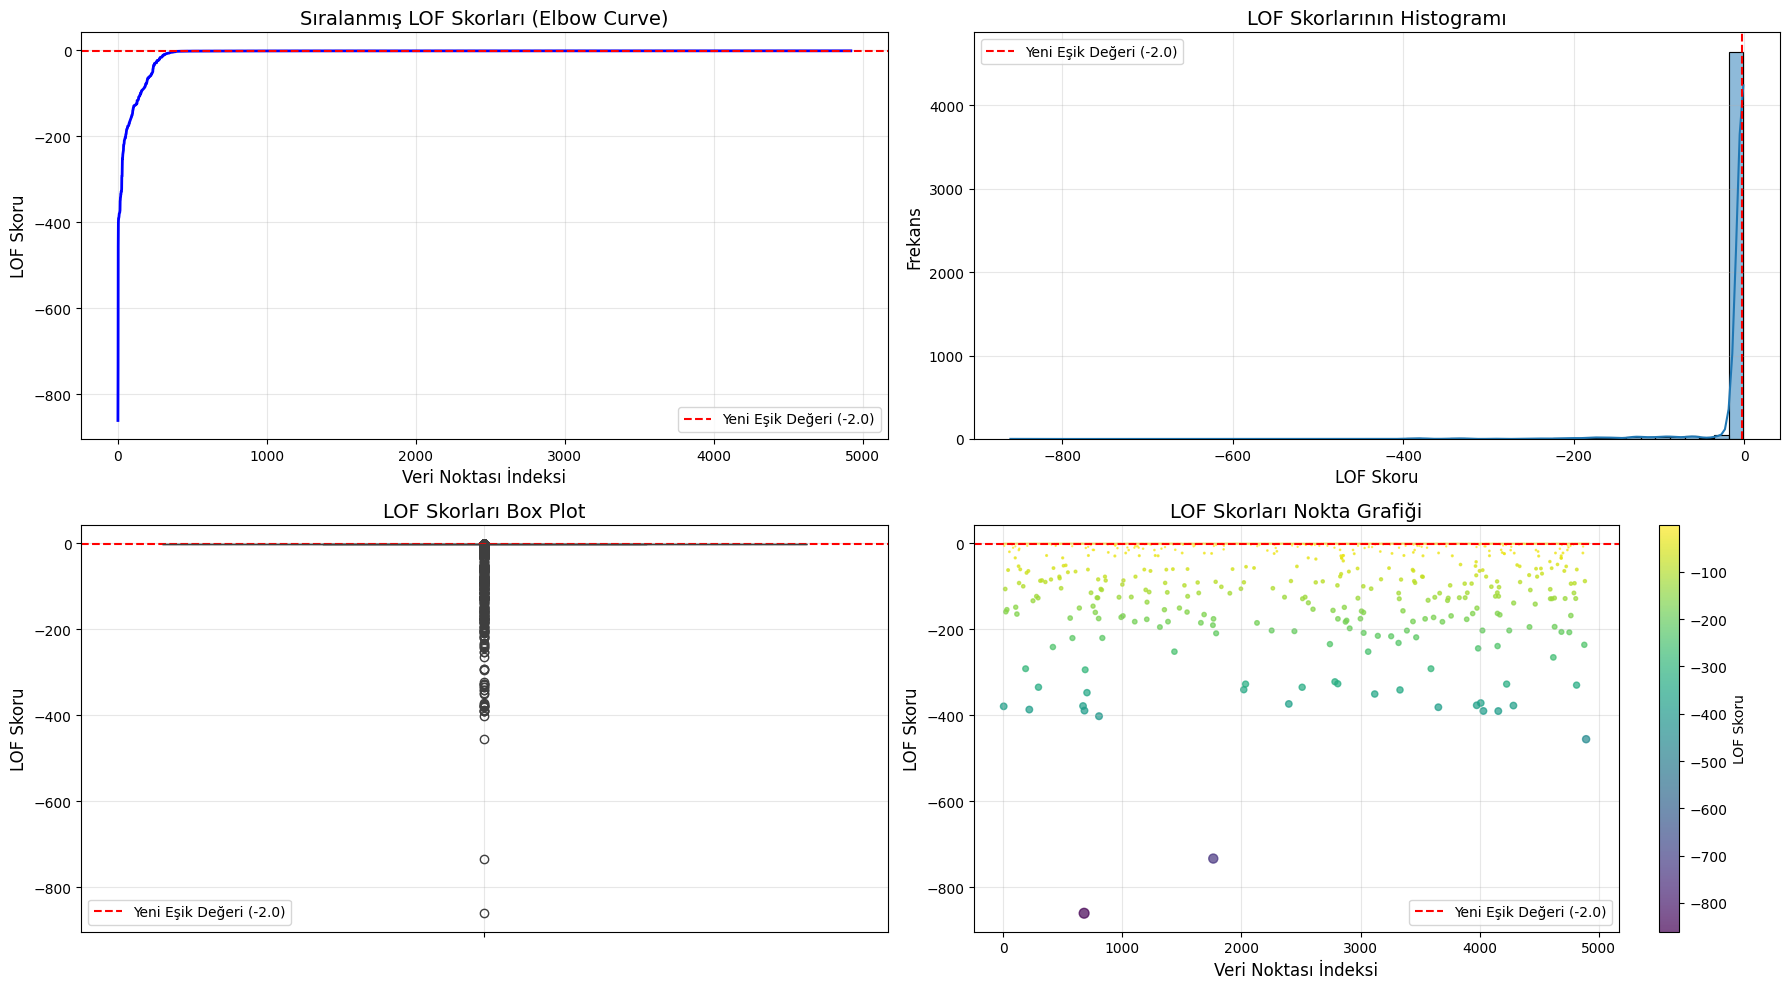

Eşik değeri -1.1 için aykırı değer sayısı: 1325

Toplam verinin %26.92'i

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Figure boyutunu ayarla
plt.figure(figsize=(18, 10))

# 1. Sıralanmış LOF skorları - Elbow Curve
plt.subplot(2, 2, 1)
sorted_scores = np.sort(df_scores)
plt.plot(sorted_scores, 'b-', linewidth=2)
plt.axhline(y=-2, color='r', linestyle='--', label='Yeni Eşik Değeri (-2.0)')
plt.title('Sıralanmış LOF Skorları (Elbow Curve)', fontsize=14)
plt.xlabel('Veri Noktası İndeksi', fontsize=12)
plt.ylabel('LOF Skoru', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# 2. LOF Skorlarının Histogramı
plt.subplot(2, 2, 2)
sns.histplot(df_scores, bins=50, kde=True)
plt.axvline(x=-2, color='r', linestyle='--', label='Yeni Eşik Değeri (-2.0)')
plt.title('LOF Skorlarının Histogramı', fontsize=14)
plt.xlabel('LOF Skoru', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(y=df_scores)
plt.axhline(y=-2, color='r', linestyle='--', label='Yeni Eşik Değeri (-2.0)')
plt.title('LOF Skorları Box Plot', fontsize=14)
plt.ylabel('LOF Skoru', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# 4. Scatter Plot - Nokta büyüklüğü LOF skoruna göre
plt.subplot(2, 2, 4)
# Skorları 0-1 arasına normalize et (scatter plot için)
normalized_scores = (df_scores - df_scores.min()) / (df_scores.max() - df_scores.min())
sizes = 50 * (1 - normalized_scores)  # Daha düşük skor = daha büyük nokta

# İndeks değerlerini x, skorları y ekseninde göster
plt.scatter(range(len(df_scores)), df_scores, s=sizes, alpha=0.7, 
            c=df_scores, cmap='viridis')
plt.axhline(y=-2, color='r', linestyle='--', label='Yeni Eşik Değeri (-2.0)')
plt.colorbar(label='LOF Skoru')
plt.title('LOF Skorları Nokta Grafiği', fontsize=14)
plt.xlabel('Veri Noktası İndeksi', fontsize=12)
plt.ylabel('LOF Skoru', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Bonus: Aykırı değerlerin belirlenmesi
threshold = -1.1 # Yeni eşik değeri
outliers = df_scores < threshold
print(f"Eşik değeri {threshold} için aykırı değer sayısı: {outliers.sum()}")
print(f"Toplam verinin %{outliers.sum() / len(df_scores) * 100:.2f}'i")

In [120]:
# Farklı parametre kombinasyonlarını test etmek için
contamination_values = [0.01, 0.02, 0.03, 0.05, 0.1]
neighbor_values = [20, 30, 40, 50, 60, 70]

results = {}
for cont in contamination_values:
    for n in neighbor_values:
        clf = LocalOutlierFactor(n_neighbors=n, contamination=cont)
        y_pred = clf.fit_predict(df_numeric)  # X, işlenecek özellikleriniz
        outlier_count = (y_pred == -1).sum()
        results[(cont, n)] = outlier_count
        print(f"contamination={cont}, n_neighbors={n}: {outlier_count} aykırı değer")

contamination=0.01, n_neighbors=20: 50 aykırı değer

contamination=0.01, n_neighbors=30: 50 aykırı değer

contamination=0.01, n_neighbors=40: 50 aykırı değer

contamination=0.01, n_neighbors=50: 50 aykırı değer

contamination=0.01, n_neighbors=60: 50 aykırı değer

contamination=0.01, n_neighbors=70: 50 aykırı değer

contamination=0.02, n_neighbors=20: 99 aykırı değer

contamination=0.02, n_neighbors=30: 99 aykırı değer

contamination=0.02, n_neighbors=40: 99 aykırı değer

contamination=0.02, n_neighbors=50: 99 aykırı değer

contamination=0.02, n_neighbors=60: 99 aykırı değer

contamination=0.02, n_neighbors=70: 99 aykırı değer

contamination=0.03, n_neighbors=20: 148 aykırı değer

contamination=0.03, n_neighbors=30: 147 aykırı değer

contamination=0.03, n_neighbors=40: 148 aykırı değer

contamination=0.03, n_neighbors=50: 147 aykırı değer

contamination=0.03, n_neighbors=60: 148 aykırı değer

contamination=0.03, n_neighbors=70: 148 aykırı değer

contamination=0.05, n_neighbors=20: 247 aykırı değer

contamination=0.05, n_neighbors=30: 247 aykırı değer

contamination=0.05, n_neighbors=40: 247 aykırı değer

contamination=0.05, n_neighbors=50: 247 aykırı değer

contamination=0.05, n_neighbors=60: 247 aykırı değer

contamination=0.05, n_neighbors=70: 247 aykırı değer

contamination=0.1, n_neighbors=20: 493 aykırı değer

contamination=0.1, n_neighbors=30: 493 aykırı değer

contamination=0.1, n_neighbors=40: 493 aykırı değer

contamination=0.1, n_neighbors=50: 493 aykırı değer

contamination=0.1, n_neighbors=60: 493 aykırı değer

contamination=0.1, n_neighbors=70: 493 aykırı değer

In [121]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

def __remove_outliers_with_lof(data) -> pd.DataFrame:

    numeric_df = data.select_dtypes(include=["int64"])

    clf = LocalOutlierFactor(n_neighbors=50, contamination=0.05)
    clf.fit_predict(numeric_df)
    data["NEF"] = clf.negative_outlier_factor_
    threshold = -1.22
    outliers = data["NEF"] < threshold
    data = data[~outliers]
    data = data.drop(columns=["NEF"], axis="columns")
    return data
    


In [122]:
df = __remove_outliers_with_lof(df)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3902 entries, 0 to 5032
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  3902 non-null   object  
 1   house_price        3902 non-null   int64   
 2   property_type      3902 non-null   category
 3   gross_area         3902 non-null   int64   
 4   net_area           3902 non-null   int64   
 5   room_count         3902 non-null   int64   
 6   living_room_count  3902 non-null   int64   
 7   bathroom_count     3902 non-null   int64   
 8   heating            3902 non-null   category
 9   floor_number       3902 non-null   int64   
 10  total_floors       3902 non-null   int64   
 11  building_age       3902 non-null   int64   
 12  province           3902 non-null   category
 13  district           3902 non-null   category
 14  neighborhood       3902 non-null   category
 15  usage_status       3902 non-null   object  
 16  deed_status

In [124]:
df["house_price"].describe()

count    3.902000e+03
mean     3.743117e+06
std      2.489911e+06
min      1.030000e+06
25%      2.200000e+06
50%      3.097500e+06
75%      4.500000e+06
max      1.725000e+07
Name: house_price, dtype: float64

In [125]:
df["living_room_count"].unique()

array([1, 0, 2, 3])

In [126]:
df.loc[df["house_price"]<1_000_000]

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url


In [127]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,1,2,Kombi,9,...,6,Adana,Seyhan,Gürselpaşa,Mülk Sahibi,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gursel...
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,0,1,Isıtma Yok,0,...,12,Adana,Çukurova,Huzurevleri,Boş,Kat Mülkiyeti,Evet,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,1,2,Kombi,1,...,10,Adana,Çukurova,Mahfesığmaz,Mülk Sahibi,Kat Mülkiyeti,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-mahf...
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,1,2,Yerden Isıtma,4,...,0,Adana,Seyhan,Gazipaşa,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gazipa...
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,1,2,Kombi,3,...,4,Adana,Çukurova,Huzurevleri,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...


In [128]:
df["furnished"].value_counts()

furnished
Eşyalı Değil    2398
Bilgi yok        715
Boş              645
Eşyalı           144
Name: count, dtype: int64

In [129]:
def __convert_furnished_values(house_df: pd.DataFrame) -> pd.DataFrame:
    df = house_df.copy()

    if "furnished" not in df.columns:
        logger.error("The 'furnished' column was not found in the DataFrame.")
        return df

    change_values = {
        "Eşyalı": "Eşyalı",
        "Eşyasız": "Eşyalı Değil",
        "Bilgi yok": "Eşyalı Değil",
        "Belirtilmemiş": "Eşyalı Değil",
        "Eşyalı Değil":"Eşyalı Değil",
        "Boş": "Eşyalı Değil",
    }

    df["furnished"] = df["furnished"].replace(change_values)
    df["furnished"] = pd.Categorical(df["furnished"])
    logger.info(f"House furnished values replaced successfully.")

    return df

In [130]:
df = __convert_furnished_values(house_df=df)

2025-03-25 00:59 - INFO - House furnished values replaced successfully.


In [131]:
df["furnished"].value_counts()

furnished
Eşyalı Değil    3758
Eşyalı           144
Name: count, dtype: int64

In [132]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,1,2,Kombi,9,...,6,Adana,Seyhan,Gürselpaşa,Mülk Sahibi,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gursel...
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,0,1,Isıtma Yok,0,...,12,Adana,Çukurova,Huzurevleri,Boş,Kat Mülkiyeti,Evet,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,1,2,Kombi,1,...,10,Adana,Çukurova,Mahfesığmaz,Mülk Sahibi,Kat Mülkiyeti,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-mahf...
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,1,2,Yerden Isıtma,4,...,0,Adana,Seyhan,Gazipaşa,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gazipa...
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,1,2,Kombi,3,...,4,Adana,Çukurova,Huzurevleri,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...


In [133]:
df["deed_status"].value_counts()    

deed_status
Kat Mülkiyeti         2827
Kat İrtifakı           894
Tapu Kaydı Yok          78
Yabancıdan              28
Tapu Yok                25
Bilgi yok               23
Hisseli Tapu             9
Arsa Tapulu              7
Arsa                     4
Müstakil Tapulu          4
Bilinmiyor               2
Kooperatiften Tapu       1
Name: count, dtype: int64

In [134]:
def __clean_deed_status(house_df) -> pd.DataFrame:
    df = house_df.copy()

    if "deed_status" not in df.columns:
        logger.error("The 'deed_status' column was not found in the DataFrame.")
        return df
    
    df = df[(df["deed_status"] != "Bilgi yok") & (df["deed_status"] != "Arsa") & (df["deed_status"] != "Bilinmiyor") & (df["deed_status"] != "Kooperatiften Tapu")]

    change_values = {
        "Kat Mülkiyeti": "Kat Mülkiyeti",
        "Kat İrtifakı": "Kat İrtifakı",
        "Yabancıdan": "Yabancıdan",

        "Tapu Yok": "Tapu Yok",
        "Tapu Kaydı Yok": "Tapu Yok",
        "Bilgi yok": "Tapu Yok",
        "Belirtilmemiş": "Tapu Yok",

        "Müstakil Tapulu": "Müstakil Tapu",
        "Hisseli Tapu": "Hisseli Tapu",
        "Arsa Tapulu": "Hisseli Tapu",
    }

    df["deed_status"] = df["deed_status"].replace(change_values)
    df["deed_status"] = pd.Categorical(df["deed_status"])
    logger.info(f"House deed_status values replaced successfully.")

    return df

In [135]:
df = __clean_deed_status(house_df=df)

2025-03-25 00:59 - INFO - House deed_status values replaced successfully.


In [136]:
df["deed_status"].value_counts()

deed_status
Kat Mülkiyeti    2827
Kat İrtifakı      894
Tapu Yok          103
Yabancıdan         28
Hisseli Tapu       16
Müstakil Tapu       4
Name: count, dtype: int64

In [137]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,1,2,Kombi,9,...,6,Adana,Seyhan,Gürselpaşa,Mülk Sahibi,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gursel...
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,0,1,Isıtma Yok,0,...,12,Adana,Çukurova,Huzurevleri,Boş,Kat Mülkiyeti,Evet,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,1,2,Kombi,1,...,10,Adana,Çukurova,Mahfesığmaz,Mülk Sahibi,Kat Mülkiyeti,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-mahf...
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,1,2,Yerden Isıtma,4,...,0,Adana,Seyhan,Gazipaşa,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gazipa...
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,1,2,Kombi,3,...,4,Adana,Çukurova,Huzurevleri,Boş,Kat İrtifakı,Hayır,Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...


In [138]:
df.credit_eligible.value_counts()

credit_eligible
Uygun                  2501
Krediye Uygun          1044
Uygun değil             228
Krediye Uygun Değil      60
Bilinmiyor               39
Name: count, dtype: int64

In [139]:
def __convert_credit_eligible_values(house_df) -> pd.DataFrame:

    df = house_df.copy()

    if "credit_eligible" not in df.columns:
        logger.error("The 'credit_eligible' column was not found in the DataFrame.")
        return df
    
    df = df[(df["credit_eligible"] != "Bilgi yok") & (df["credit_eligible"] != "Belirtilmemiş") & (df["credit_eligible"] != "Bilinmiyor")]

    change_values = {
        "Uygun" : "Krediye Uygun",
        "Krediye Uygun" : "Krediye Uygun",
        "Uygun Değil" : "Krediye Uygun Değil",
        "Uygun değil" : "Krediye Uygun Değil",
        "Krediye Uygun Değil" : "Krediye Uygun Değil",
    }

    df["credit_eligible"] = df["credit_eligible"].replace(change_values)
    df["credit_eligible"] = pd.Categorical(df["credit_eligible"])
    logger.info(f"House credit_eligible values replaced successfully.")

    return df

In [140]:
df = __convert_credit_eligible_values(house_df=df)

2025-03-25 00:59 - INFO - House credit_eligible values replaced successfully.


In [141]:
df["credit_eligible"].value_counts()

credit_eligible
Krediye Uygun          3545
Krediye Uygun Değil     288
Name: count, dtype: int64

In [142]:
df.head()

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
0,GÜRSELPAŞA’DA FULL SOSYAL DONATILI GENİŞ OTURU...,7300000,Satılık Daire,170,150,4,1,2,Kombi,9,...,6,Adana,Seyhan,Gürselpaşa,Mülk Sahibi,Kat İrtifakı,Hayır,Krediye Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gursel...
1,HUZUREVLERİNDE İSKANLI HASARSIZ 3 CEPHELİ 25 m...,1399000,Satılık Daire,25,22,1,0,1,Isıtma Yok,0,...,12,Adana,Çukurova,Huzurevleri,Boş,Kat Mülkiyeti,Evet,Krediye Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...
2,KENAN EVREN BLV. YÜRÜME MESAFESİNDE 2+1+ÇB+GO+...,3500000,Satılık Daire,125,100,2,1,2,Kombi,1,...,10,Adana,Çukurova,Mahfesığmaz,Mülk Sahibi,Kat Mülkiyeti,Hayır,Krediye Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-mahf...
3,İZZET OKLU İNSAATTAN İSKANI ALINMIŞ OTURUMA HA...,15500000,Satılık Daire,195,149,4,1,2,Yerden Isıtma,4,...,0,Adana,Seyhan,Gazipaşa,Boş,Kat İrtifakı,Hayır,Krediye Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-seyhan-gazipa...
4,SK’DAN BAŞKENT OKULLARI YANİ LÜKS İŞÇİLİKLİ 4+...,7450000,Satılık Daire,145,135,4,1,2,Kombi,3,...,4,Adana,Çukurova,Huzurevleri,Boş,Kat İrtifakı,Hayır,Krediye Uygun,Eşyalı Değil,https://www.hepsiemlak.com/adana-cukurova-huzu...


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3833 entries, 0 to 5032
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   house_description  3833 non-null   object  
 1   house_price        3833 non-null   int64   
 2   property_type      3833 non-null   category
 3   gross_area         3833 non-null   int64   
 4   net_area           3833 non-null   int64   
 5   room_count         3833 non-null   int64   
 6   living_room_count  3833 non-null   int64   
 7   bathroom_count     3833 non-null   int64   
 8   heating            3833 non-null   category
 9   floor_number       3833 non-null   int64   
 10  total_floors       3833 non-null   int64   
 11  building_age       3833 non-null   int64   
 12  province           3833 non-null   category
 13  district           3833 non-null   category
 14  neighborhood       3833 non-null   category
 15  usage_status       3833 non-null   object  
 16  deed_status

In [144]:
df["living_room_count"].value_counts()

living_room_count
1    3795
0      23
2      14
3       1
Name: count, dtype: int64

In [146]:
df[df["house_price"]<1_000_000]

,house_description,house_price,property_type,gross_area,net_area,room_count,living_room_count,bathroom_count,heating,floor_number,...,building_age,province,district,neighborhood,usage_status,deed_status,exchange,credit_eligible,furnished,house_url
